#### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shutil
import os

###  #1: Merging the 12 months of sales data into a single csv file

#### checking all the files in our directory

In [2]:
files = [file for file in os.listdir(r'..\Sales_Data')]
for file in files:
    print(file)

.ipynb_checkpoints
Sales Analysis.ipynb
Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


#### Checking content of one file

In [3]:
df = pd.read_csv(r'..\Sales_Data\Sales_April_2019.csv')
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
18378,194090,Google Phone,1,600,04/08/19 17:11,"177 Jackson St, Los Angeles, CA 90001"
18379,194091,AA Batteries (4-pack),1,3.84,04/15/19 16:02,"311 Forest St, Austin, TX 73301"
18380,194092,AAA Batteries (4-pack),2,2.99,04/28/19 14:36,"347 Sunset St, San Francisco, CA 94016"
18381,194093,AA Batteries (4-pack),1,3.84,04/14/19 15:09,"835 Lake St, Portland, OR 97035"


#### Merging all files in one

In [4]:
all_months_data = pd.DataFrame()#creating an empty dataframe to store all 12 months
for file in os.listdir(os.getcwd()):
    if file.endswith('.csv'):
        df = pd.read_csv(file)
        all_months_data = pd.concat([all_months_data,df])
all_months_data.to_csv('all_data.csv', index = False)

In [5]:
all_data = pd.read_csv(r'..\Sales_Data\all_data.csv')
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


### #2: Exploring data

In [6]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [7]:
#checking null values
pd.isnull(all_data).sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [8]:
#Checking lines with null values
all_data[all_data.isna().any(axis = 1)].head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
all_data.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


### #3: Data cleaning

In [10]:
# Droping null values
all_data = all_data.dropna()

##### Adding a month column

In [11]:
# we got the following error when trying to create the month column: ValueError: invalid literal for int() with base 10: 'Or'
#To fix it, we'll find 'Or' values
temp_df = all_data[all_data['Order Date'].str[0:2] == 'Or']
temp_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [12]:
# To fix the issue, our all_data dataframe will be equal to line where order date != 'Or'
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


#### Correcting columns with the suitable data type

In [13]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [14]:
# Adding month column
all_data['Month'] = all_data['Order Date'].str[0:2] #getting 2 first position of order date
all_data['Month'] = all_data['Month'].astype('int64')
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9


##### Normally, we could split columns with the comma separator then as follows : all_data[['Street','City','Zip']] = all_data['Purchase Address'].str.split(',', expand = True)  and separate state and zipcode with : all_data[['State','Zip']] = all_data['Zip'].str.extract(r'([A-Za-z]+)\s+(\d+)')       But it's better to take the city with state because it's possible having the same city name in two different state (here Portland bc there's Portland in Main and Portland in Oregon).      Otherwise , let's use the apply function

In [15]:
# splitting address column in another way
def get_city(address):
    return address.split(',')[1]
def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x) + ' ('+ get_state(x) +')')
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA)
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,Los Angeles (CA)
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,San Francisco (CA)
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,San Francisco (CA)
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,San Francisco (CA)


In [16]:
#separating Zip code and zip number
#all_data[['State','Zip']] = all_data['Zip'].str.extract(r'([A-Za-z]+)\s+(\d+)')
#all_data

In [17]:
# reseting indexes
all_data = all_data.reset_index(drop = True)
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX)
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA)
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA)
...,...,...,...,...,...,...,...,...
185945,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,Los Angeles (CA)
185946,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,San Francisco (CA)
185947,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,San Francisco (CA)
185948,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,San Francisco (CA)


### #4: Analysing data

### Question 1 : What was the best month for sales ? How much was earned that month?

In [18]:
# Adding a new column sales amount
all_data['Sales amount'] = all_data['Quantity Ordered'] * all_data['Price Each'] 
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales amount
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.90
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),99.99
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99
...,...,...,...,...,...,...,...,...,...
185945,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,Los Angeles (CA),8.97
185946,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,San Francisco (CA),700.00
185947,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,San Francisco (CA),700.00
185948,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,San Francisco (CA),379.99


In [19]:
monthly_sales = all_data.groupby('Month').sum(numeric_only=True)
monthly_sales

,Quantity Ordered,Price Each,Sales amount
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


In [20]:
best_month_sales = monthly_sales.idxmax()
best_month_sales

Quantity Ordered    12
Price Each          12
Sales amount        12
dtype: int64

##### The best month sale is December with a total sales amount of 9226886.68 and this can be explained with the fact in December there's lot of holidays and people buy lot of gifts and items

Text(0, 0.5, 'Sales in US$')

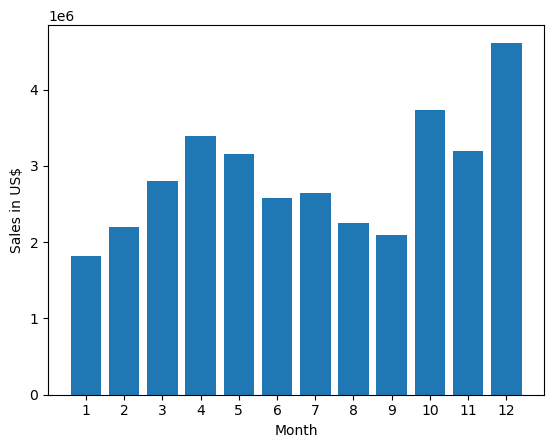

In [21]:
#ploting the result in a bar chart
months = range(1,13)
plt.bar(months, monthly_sales['Sales amount'])
plt.xticks(months)
plt.xlabel('Month')
plt.ylabel('Sales in US$')

### Checking for correlation between variables

In [22]:
selected_columns = ['Product','Quantity Ordered','Price Each','Month','City']
new_df = all_data[selected_columns].copy()
new_df

,Product,Quantity Ordered,Price Each,Month,City
0,USB-C Charging Cable,2,11.95,4,Dallas (TX)
1,Bose SoundSport Headphones,1,99.99,4,Boston (MA)
2,Google Phone,1,600.00,4,Los Angeles (CA)
3,Wired Headphones,1,11.99,4,Los Angeles (CA)
4,Wired Headphones,1,11.99,4,Los Angeles (CA)
...,...,...,...,...,...
185945,AAA Batteries (4-pack),3,2.99,9,Los Angeles (CA)
185946,iPhone,1,700.00,9,San Francisco (CA)
185947,iPhone,1,700.00,9,San Francisco (CA)
185948,34in Ultrawide Monitor,1,379.99,9,San Francisco (CA)


In [23]:
#Since corr () method consider only numeric values, we'll numerize all columns and check for correlation
new_df.loc[:,'Product'] = pd.factorize(new_df['Product'])[0]
new_df.loc[:,'City'] = pd.factorize(new_df['City'])[0]
all_data_numerized = new_df
for col_name in all_data_numerized.columns:
    if(all_data_numerized[col_name].dtype == 'object'):
        all_data_numerized[col_name] = all_data_numerized[col_name].astype('category')
        all_data_numerized[col_name] = all_data_numerized[col_name].cat.codes
all_data_numerized

C:\Users\seynabou.sene\AppData\Local\Temp\ipykernel_22604\3504265042.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  new_df.loc[:,'Product'] = pd.factorize(new_df['Product'])[0]
C:\Users\seynabou.sene\AppData\Local\Temp\ipykernel_22604\3504265042.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  new_df.loc[:,'City'] = pd.factorize(new_df['City'])[0]


,Product,Quantity Ordered,Price Each,Month,City
0,0,2,11.95,4,0
1,1,1,99.99,4,1
2,2,1,600.00,4,2
3,3,1,11.99,4,2
4,3,1,11.99,4,2
...,...,...,...,...,...
185945,9,3,2.99,9,2
185946,10,1,700.00,9,3
185947,10,1,700.00,9,3
185948,18,1,379.99,9,3


In [24]:
# creating the correlation matrix
corr_matrix = all_data_numerized.corr()
corr_matrix

,Product,Quantity Ordered,Price Each,Month,City
Product,1.000000,0.026941,0.246142,-0.003091,-0.000725
Quantity Ordered,0.026941,1.000000,-0.148272,0.000791,-0.003223
Price Each,0.246142,-0.148272,1.000000,-0.003375,0.001633
Month,-0.003091,0.000791,-0.003375,1.000000,-0.000689
City,-0.000725,-0.003223,0.001633,-0.000689,1.000000


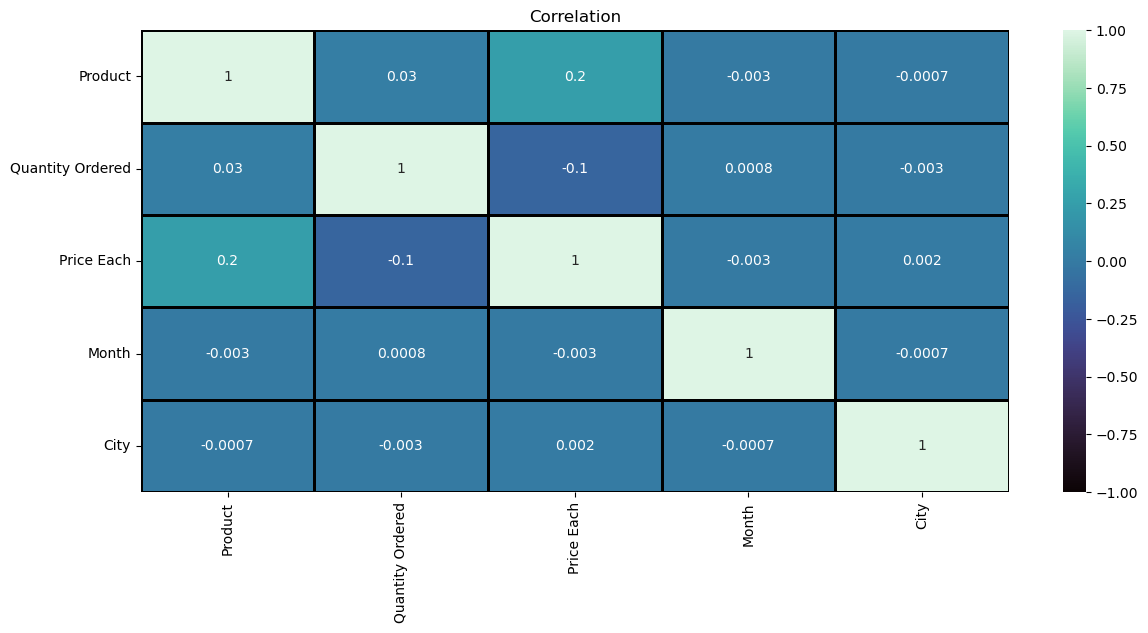

In [25]:
# Using heatmap for a better understanding
correlation_matrix = all_data_numerized.corr(method = 'pearson', numeric_only = True)
plt.figure(figsize = (14,6))
heatmap = sns.heatmap(correlation_matrix, annot = True, fmt = '.1g', vmin=-1, vmax=1, center=0, cmap='mako', linewidths=1, linecolor='Black')
heatmap.set_title('Correlation')
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)
plt.show()

#####  Chosen variables are weakly correlated

### Question 2 : What city has the highest number of sales

In [26]:
sales_per_city = all_data.groupby('City').sum(numeric_only=False).sort_values(by = 'Sales amount', ascending = False)
sales_per_city['Sales amount']

City
 San Francisco (CA)    8262203.91
 Los Angeles (CA)      5452570.80
 New York City (NY)    4664317.43
 Boston (MA)           3661642.01
 Atlanta (GA)          2795498.58
 Dallas (TX)           2767975.40
 Seattle (WA)          2747755.48
 Portland (OR)         1870732.34
 Austin (TX)           1819581.75
 Portland (ME)          449758.27
Name: Sales amount, dtype: float64

In [27]:
best_selling_city = sales_per_city['Sales amount'].idxmax()
best_selling_city

' San Francisco (CA)'

Text(0, 0.5, 'Sales in US$ per city')

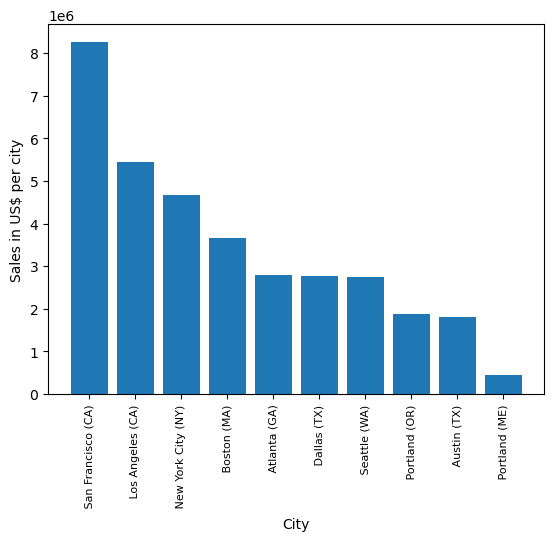

In [30]:
#ploting the result in a bar chart
sales_per_city = sales_per_city.sort_values(by='Sales amount', ascending=False)  # Sort the DataFrame by sales amount
plt.bar(sales_per_city.index, sales_per_city['Sales amount'])
plt.xticks(cities, rotation = 'vertical', size = 8)
plt.xlabel('City')
plt.ylabel('Sales in US$ per city')

##### San Francisco is the highest selling city. It can be explained by the fact that since these are electronic items, it's quite normal that Silicon Valey (located in SF) need more electronic so there's more sales

### Question 3: Top 10 most/least ordered products

In [31]:
# Top 10 most ordered products
most_purchased_products = all_data.groupby('Product')['Quantity Ordered'].sum(numeric_only=False)
top_10_purchased_products = most_purchased_products.sort_values( ascending = False).head(10)
top_10_purchased_products

Product
AAA Batteries (4-pack)        31017
AA Batteries (4-pack)         27635
USB-C Charging Cable          23975
Lightning Charging Cable      23217
Wired Headphones              20557
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
27in FHD Monitor               7550
iPhone                         6849
27in 4K Gaming Monitor         6244
Name: Quantity Ordered, dtype: int64

([<matplotlib.axis.XTick at 0x2a764e0ee90>,
 [Text(0.0, 0, '20in Monitor'),
  Text(1.0, 0, '27in 4K Gaming Monitor'),
  Text(2.0, 0, '27in FHD Monitor'),
  Text(3.0, 0, '34in Ultrawide Monitor'),
  Text(4.0, 0, 'AA Batteries (4-pack)'),
  Text(5.0, 0, 'AAA Batteries (4-pack)'),
  Text(6.0, 0, 'Apple Airpods Headphones'),
  Text(7.0, 0, 'Bose SoundSport Headphones'),
  Text(8.0, 0, 'Flatscreen TV'),
  Text(9.0, 0, 'Google Phone'),
  Text(10.0, 0, 'LG Dryer'),
  Text(11.0, 0, 'LG Washing Machine'),
  Text(12.0, 0, 'Lightning Charging Cable'),
  Text(13.0, 0, 'Macbook Pro Laptop'),
  Text(14.0, 0, 'ThinkPad Laptop'),
  Text(15.0, 0, 'USB-C Charging Cable'),
  Text(16.0, 0, 'Vareebadd Phone'),
  Text(17.0, 0, 'Wired Headphones'),
  Text(18.0, 0, 'iPhone')])

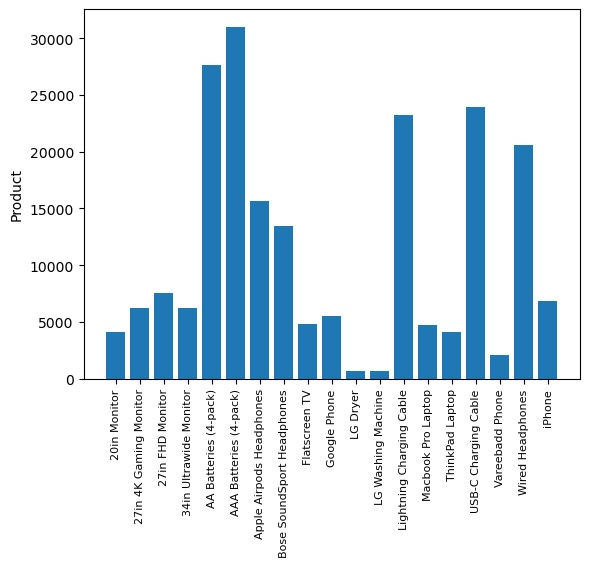

In [32]:
#ploting the results
products = [product for product, df in all_data.groupby('Product')]
plt.bar(products, all_data.groupby('Product')['Quantity Ordered'].sum(numeric_only=False))
plt.ylabel('Quantity Ordered')
plt.ylabel('Product')
plt.xticks(products, rotation = 'vertical', size = 8)

[Text(0, 0, '20in Monitor'),
 Text(1, 0, '27in 4K Gaming Monitor'),
 Text(2, 0, '27in FHD Monitor'),
 Text(3, 0, '34in Ultrawide Monitor'),
 Text(4, 0, 'AA Batteries (4-pack)'),
 Text(5, 0, 'AAA Batteries (4-pack)'),
 Text(6, 0, 'Apple Airpods Headphones'),
 Text(7, 0, 'Bose SoundSport Headphones'),
 Text(8, 0, 'Flatscreen TV'),
 Text(9, 0, 'Google Phone'),
 Text(10, 0, 'LG Dryer'),
 Text(11, 0, 'LG Washing Machine'),
 Text(12, 0, 'Lightning Charging Cable'),
 Text(13, 0, 'Macbook Pro Laptop'),
 Text(14, 0, 'ThinkPad Laptop'),
 Text(15, 0, 'USB-C Charging Cable'),
 Text(16, 0, 'Vareebadd Phone'),
 Text(17, 0, 'Wired Headphones'),
 Text(18, 0, 'iPhone')]

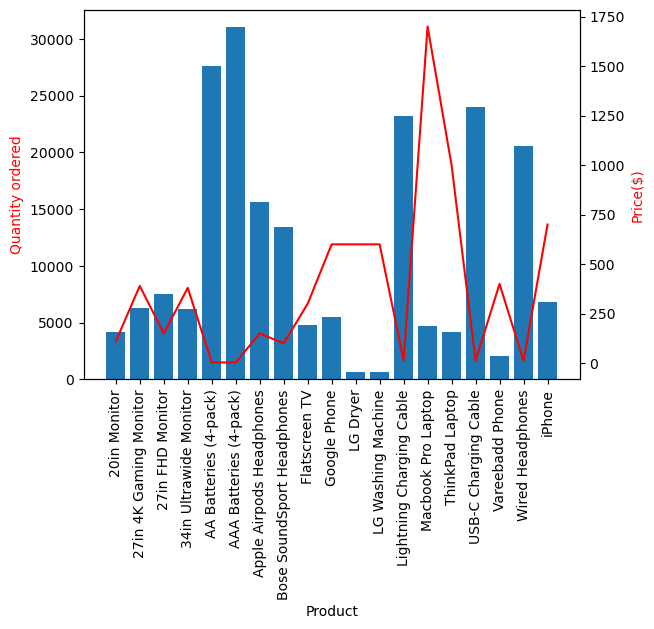

In [33]:
#let's add the line price in the plot
prices = all_data.groupby('Product')['Price Each'].mean(numeric_only=False)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(products, all_data.groupby('Product')['Quantity Ordered'].sum(numeric_only=False))
ax2.plot(products, prices,'r')

ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity ordered', color = 'r')
ax2.set_ylabel('Price($)', color = 'r')
ticks = range(len(products))
ax1.set_xticks(ticks)
ax1.set_xticklabels(products, rotation = 'vertical')

#### These items sale the most because they're cheap and often needed

In [34]:
# Top 10 least ordered products
most_purchased_products = all_data.groupby('Product')['Quantity Ordered'].sum(numeric_only=False)
top_10_purchased_products = most_purchased_products.sort_values( ascending = True).head(10)
top_10_purchased_products

Product
LG Dryer                   646
LG Washing Machine         666
Vareebadd Phone           2068
20in Monitor              4129
ThinkPad Laptop           4130
Macbook Pro Laptop        4728
Flatscreen TV             4819
Google Phone              5532
34in Ultrawide Monitor    6199
27in 4K Gaming Monitor    6244
Name: Quantity Ordered, dtype: int64

### Question 4: What time should we display advertisements to maximize the likelihood of customer’s buying product?

In [35]:
#checking Order date type
type('Order date')

str

In [36]:
# Converting Order date from str to datetime type
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales amount
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.90
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),99.99
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99


In [37]:
#getting hours and minutes
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales amount,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.90,8,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),99.99,22,30
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00,14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,14,38
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,9,27


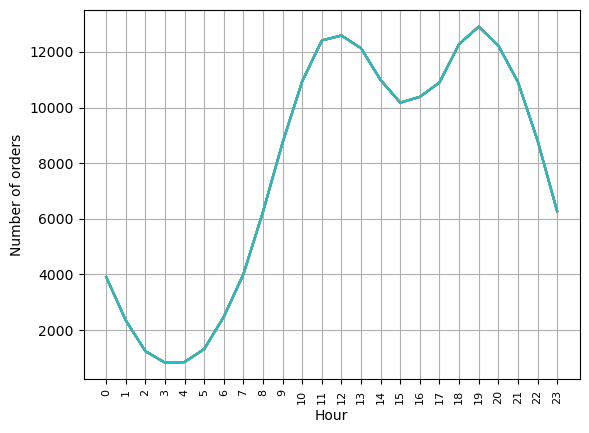

In [38]:
#ploting the result in a line chart
#We want to count the number of orders per hour
hours = [hour for hour, df in all_data.groupby('Hour')]
plt.plot(hours, all_data.groupby('Hour').count())

plt.xticks(hours, rotation = 'vertical', size = 8)
plt.xlabel('Hour')
plt.ylabel('Number of orders')
plt.grid()

#### According to the line chart, we see that we have pics of orders between 11am and 12pm and another pic at 7pm. Beetween 11 and 12, It's like the time when people are doing their chores and 7pm is like after work... So it's likely better to puts adds maybe around 1h before pic times. So It's better putting adds right before pics times (between 10 am and 11am OR between and 6pm and 7pm)

### Question 5: What products are most often sold together?

##### Let's note that if two or more products have the same order id and same purchase address,it means that they've been bought together. So we're going to count all the duplicate order ids

In [39]:
bought_together = all_data[all_data['Order ID'].duplicated(keep = False)]#keep = false because we keep all duplicates
bought_together.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales amount,Hour,Minute
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00,14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,14,38
17,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00,19,42
18,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,Los Angeles (CA),11.95,19,42
29,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,Boston (MA),99.99,11,31


In [40]:
#putting same product order in same line by adding a  new column named Grouped
bought_together['Grouped'] = bought_together.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
bought_together = bought_together[['Order ID', 'Grouped']].drop_duplicates().copy()#because it's doing it for all occurences
# Assign the modified DataFrame back to the original DataFrame using .loc
bought_together.loc[:, ['Order ID', 'Grouped']] = bought_together[['Order ID', 'Grouped']]
bought_together

C:\Users\seynabou.sene\AppData\Local\Temp\ipykernel_22604\2471414217.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bought_together['Grouped'] = bought_together.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586,"AAA Batteries (4-pack),Google Phone"
118,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
185882,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
185884,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
185892,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
185904,259314,"Wired Headphones,AAA Batteries (4-pack)"


##### Now we have product bought together, we'll be counting the pairs 

In [41]:
#importing new libraries
from itertools import combinations
from collections import Counter

count = Counter() # creating a counter
for row in bought_together['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))#2 because we want to know combination of 2 products bought together
for key, value in count.most_common(10): #Top 10 most commonly sold items
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92
